In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pre set

In [3]:
np.random.seed(0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1.get the whole picture of dataset and target

## 1.1 Whole dataset
The first thing to do when getting the data is to check the whole picture of the data with the description, such as its shape, type and distribution of variables, the proportion of missing values, etc.
>拿到数据的第一件事结合描述查看数据的全貌，比如其形状，变量的类型与分布，缺失值的占比等

It is entirely possible to initially screen out some irrelevant variables, such as indexes.
>完全可以初步筛出一些无关变量，比如索引。

In [4]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df = df.drop(columns = 'Id')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '../input/house-prices-advanced-regression-techniques/train.csv'

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [6]:
df.dtypes.to_frame().T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe(include = 'O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
overall_percent_missing = df.isnull().mean().mean()
overall_percent_missing

0.0670291095890411

In [10]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_columns = missing_count[missing_count > 0]
missing_percentage = missing_columns/len(df) #X.isnull().mean()
missing_type = df[missing_columns.index].dtypes
missing_info = pd.concat([missing_type,missing_columns, missing_percentage], axis=1)
missing_info.columns = ['missing_type','Missing Columns', 'Missing Percentage']
missing_info

,missing_type,Missing Columns,Missing Percentage
PoolQC,object,1453,0.995205
MiscFeature,object,1406,0.963014
Alley,object,1369,0.937671
Fence,object,1179,0.807534
MasVnrType,object,872,0.597260
FireplaceQu,object,690,0.472603
LotFrontage,float64,259,0.177397
GarageYrBlt,float64,81,0.055479
GarageCond,object,81,0.055479
GarageType,object,81,0.055479


## 1.2 More details
So far, global information about the data has been obtained. Now, from the perspective of numerical variables and categorical variables, the general properties of the data can be examined in more detail using a visual method.

>到目前为止已经获得了关于数据的全局信息，现在从数值变量和分类变量的角度，以可视化的方法更加细致的考察数据的一般性质。

In [11]:
numeric_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include = 'O')

### 1.2.1  Numerical variables 

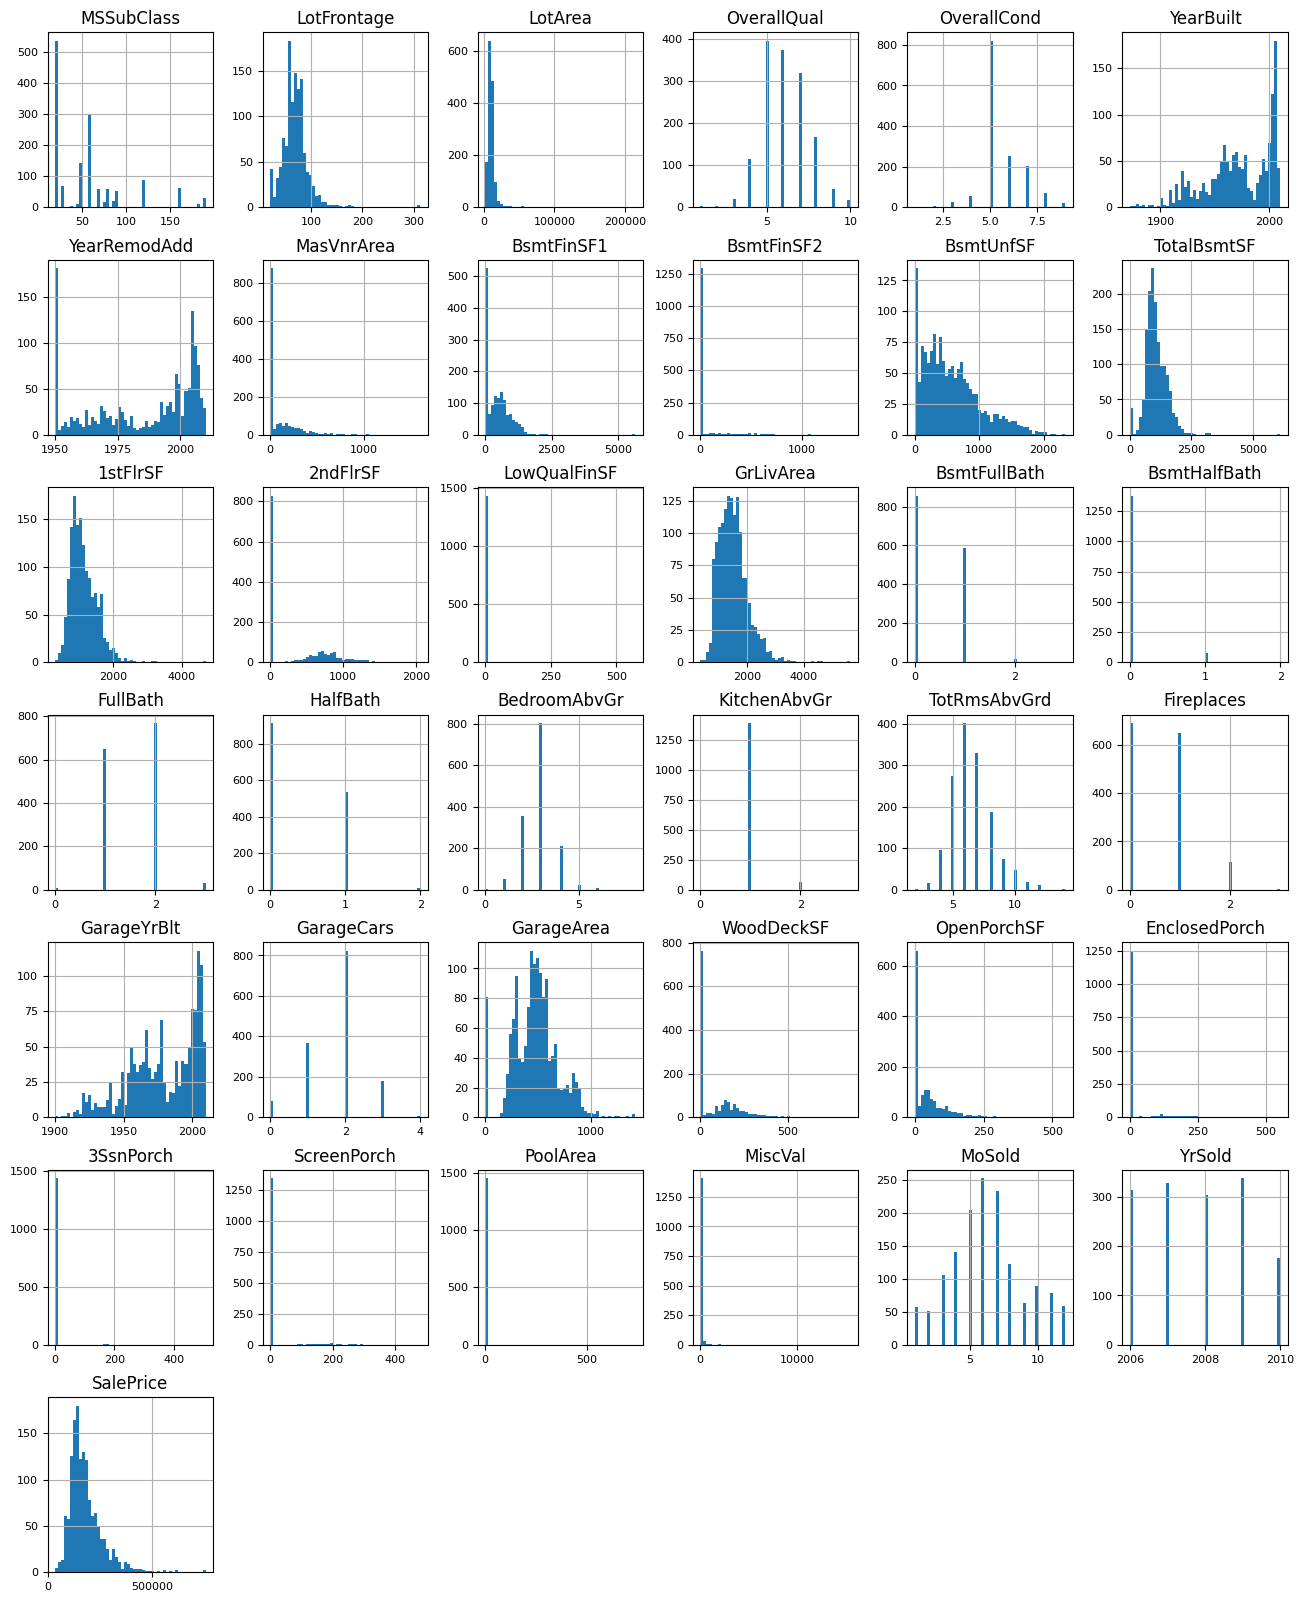

In [12]:
numeric_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

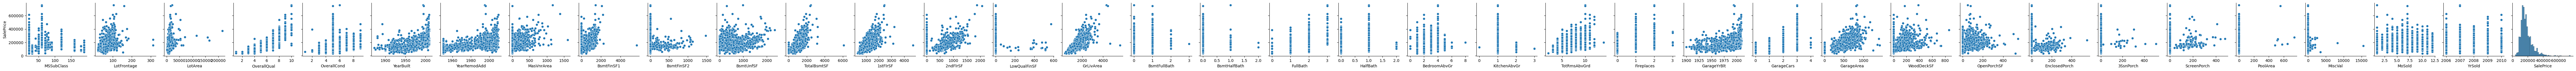

In [13]:
sns.pairplot(df,x_vars=numeric_columns.columns,y_vars=['SalePrice'])

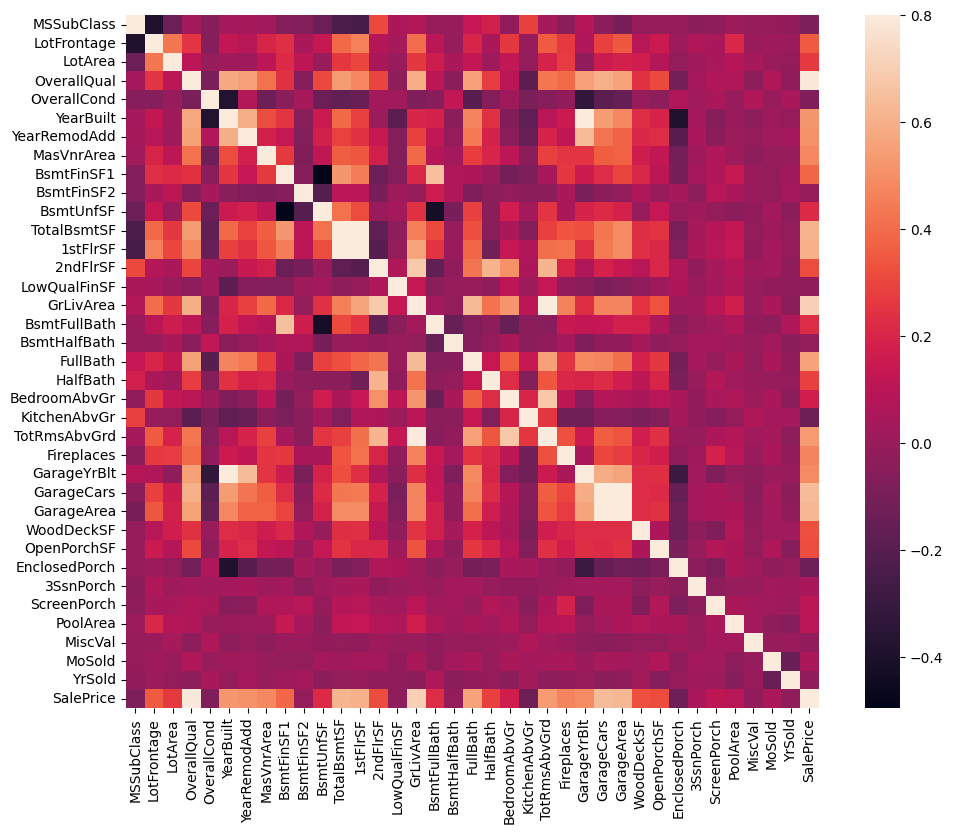

In [14]:
corrmat = numeric_columns.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# sns.heatmap(corrmat,annot=True, fmt='.2f',vmax=.8, annot_kws={'size': 5},square=True);

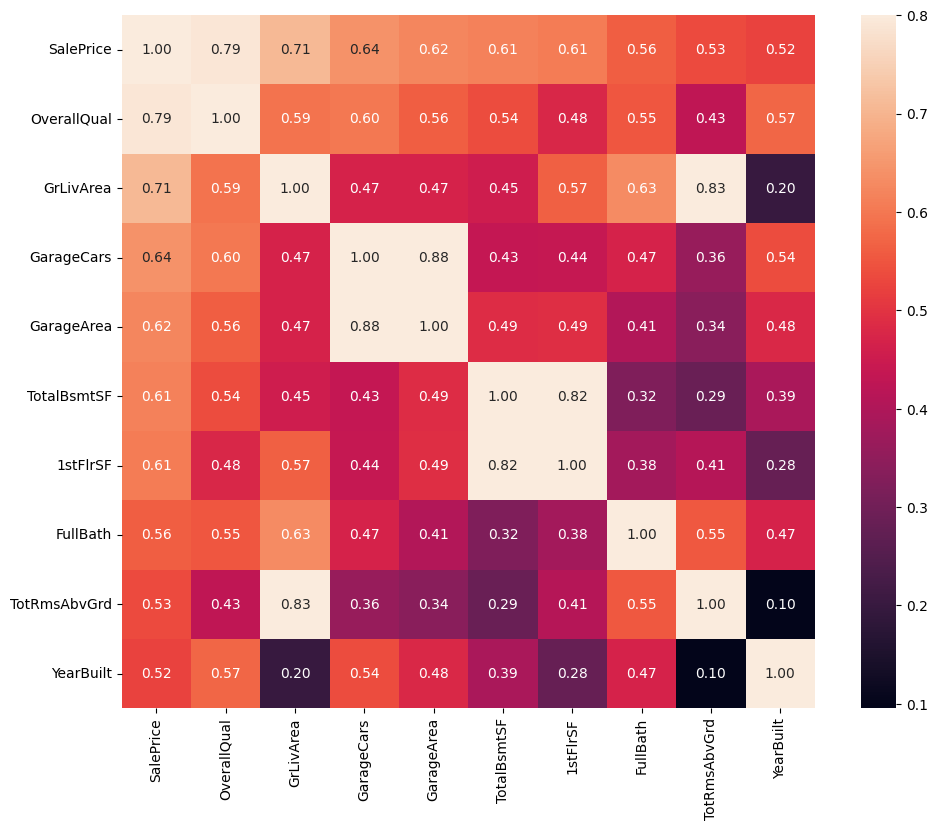

In [15]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm0 =  corrmat.loc[cols, cols]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm0,annot=True, fmt='.2f',vmax=.8, annot_kws={'size': 10},square=True);

In [16]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

### 1.2.2 Categorical variables

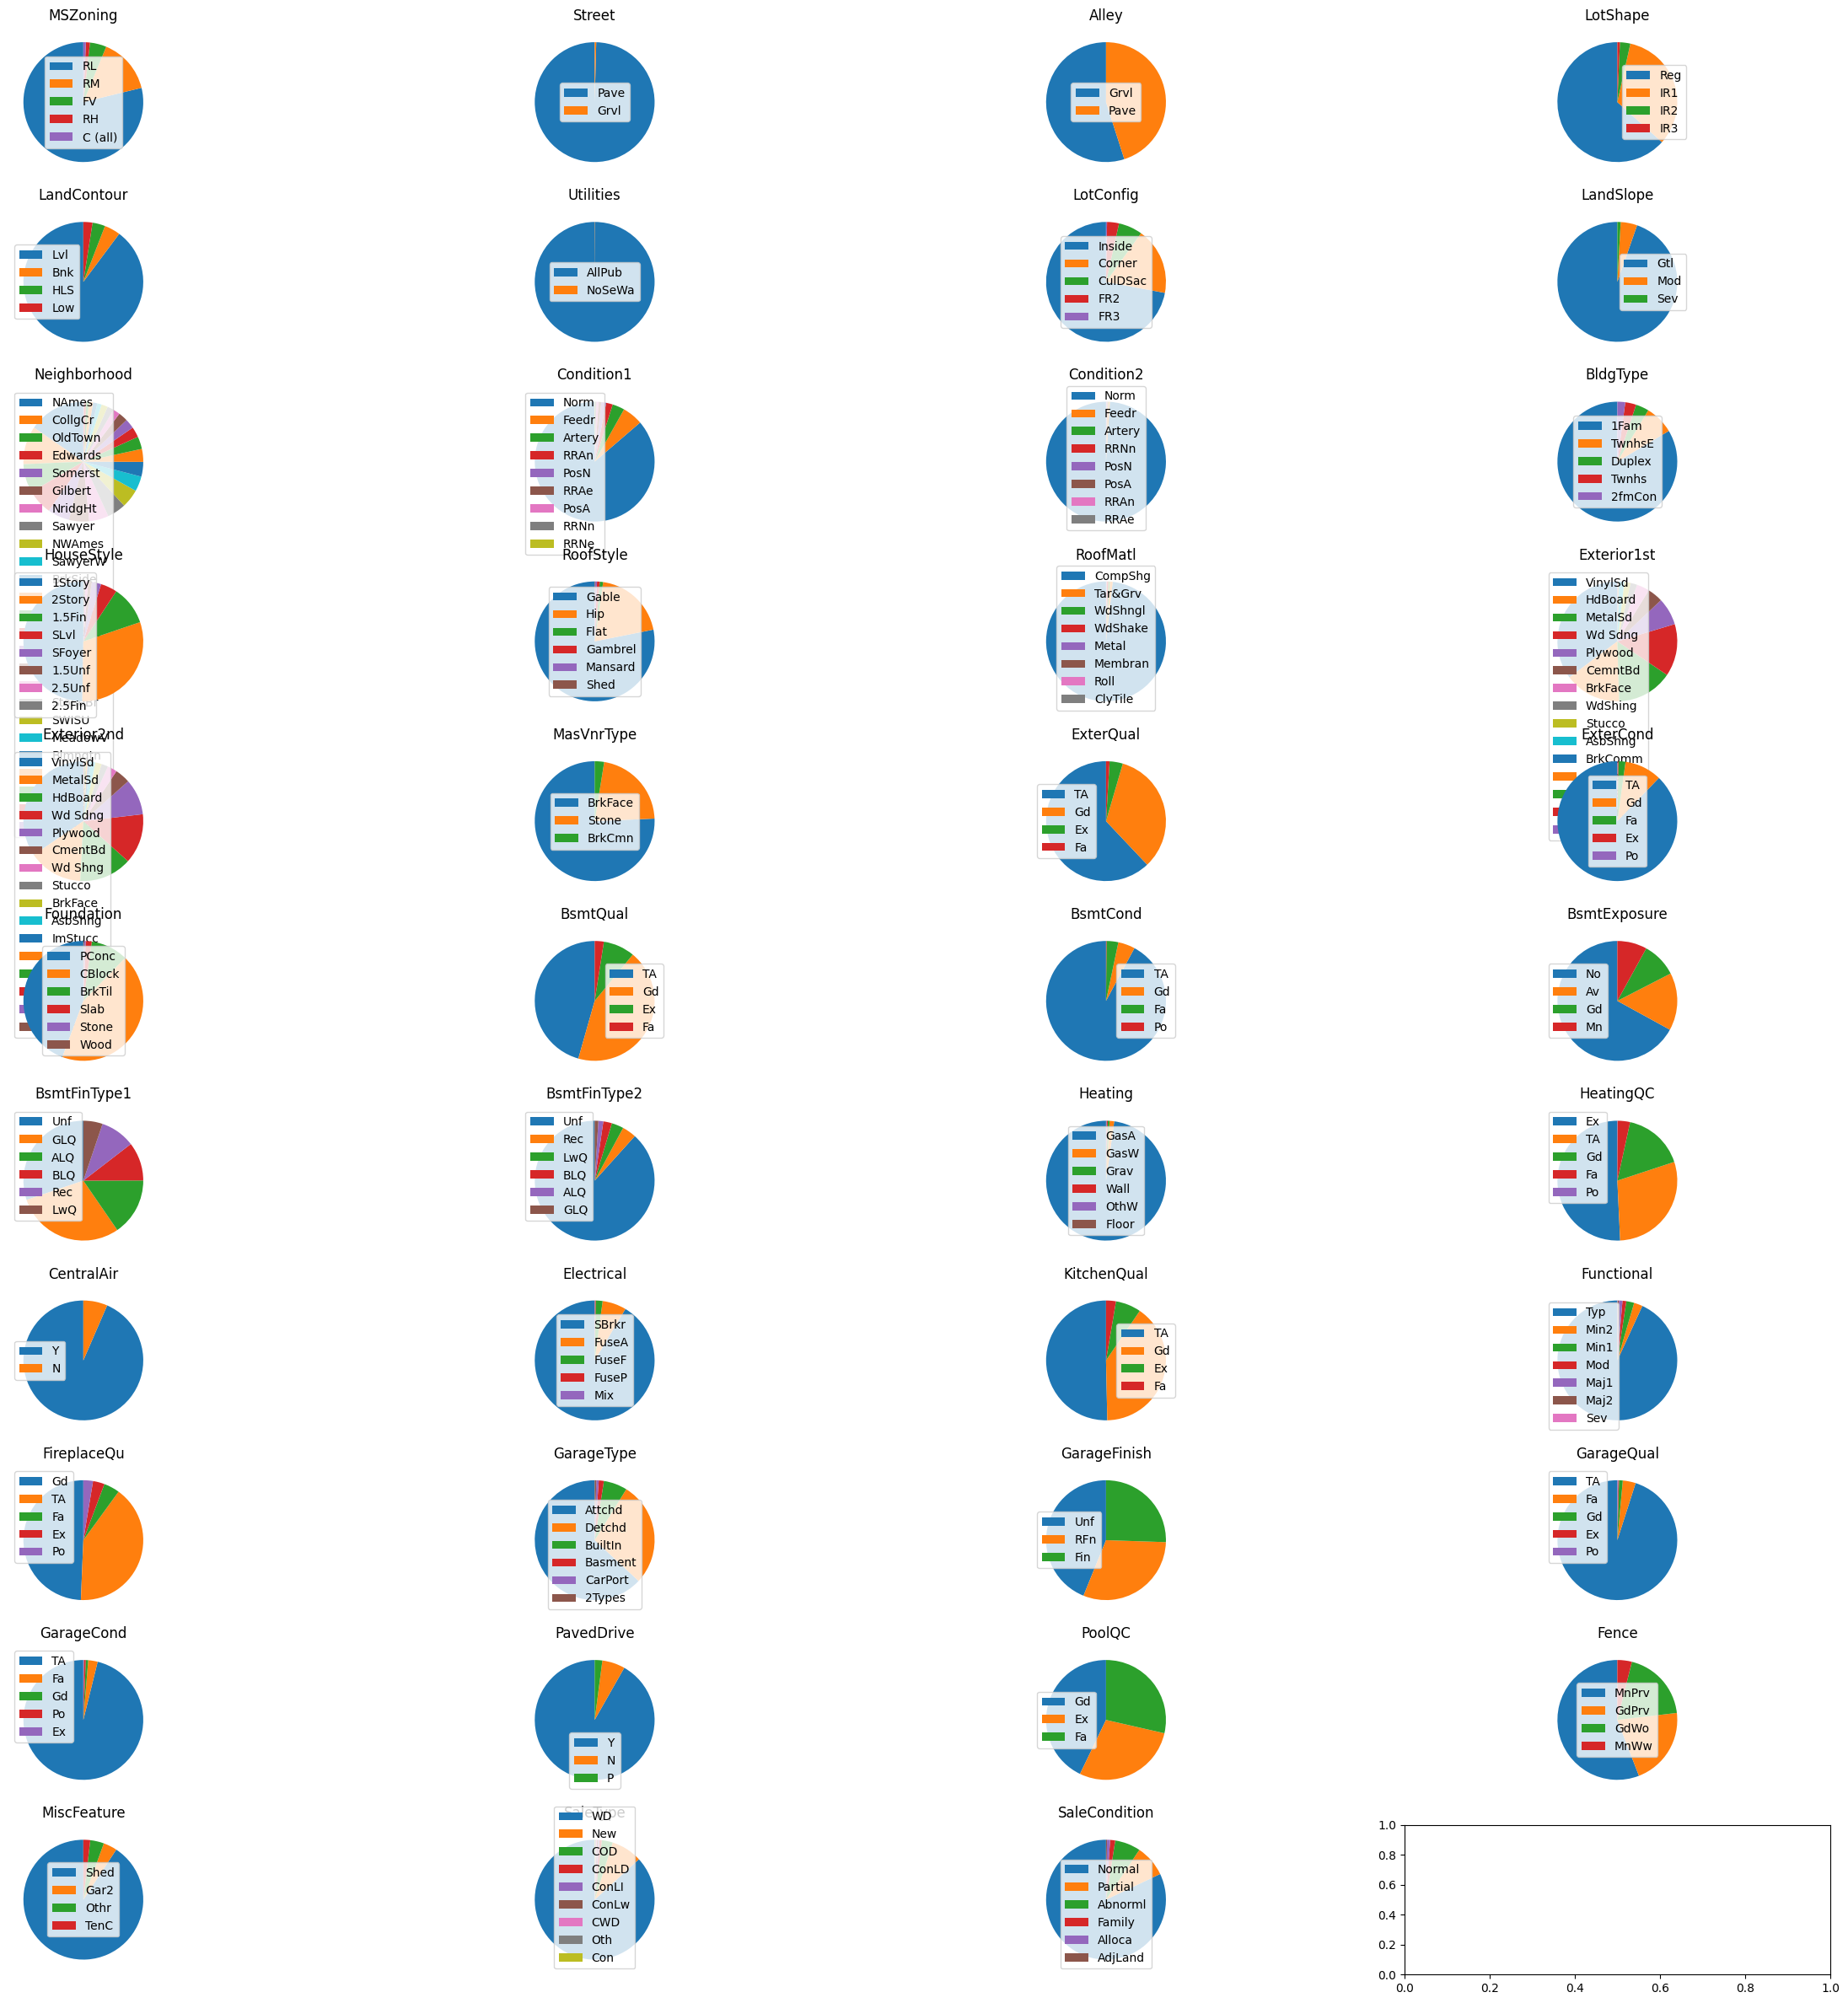

In [17]:
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(30, 30))
for i,column in enumerate(categorical_columns):
    row = i // 4
    col =i % 4
    ax = axes[row, col]  
    category_counts = df[column].value_counts()
    wedges, texts, autotexts = ax.pie(category_counts, autopct='', startangle=90)
    ax.set_title(column)  
    ax.legend(category_counts.index, loc='best')
plt.tight_layout()
plt.show()

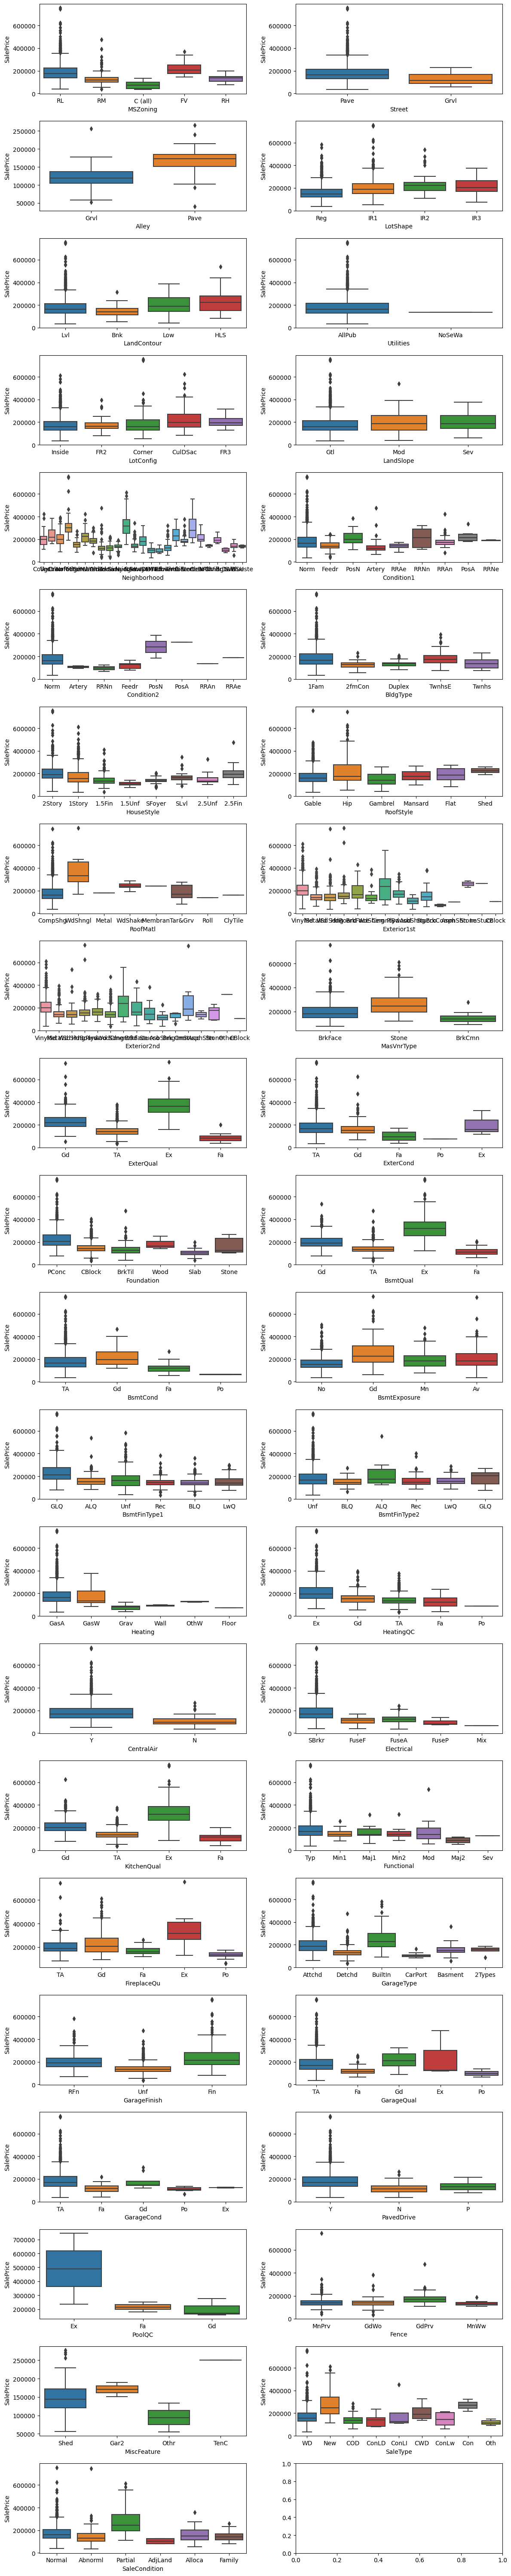

In [18]:
fig, axes = plt.subplots(nrows=22,ncols=2, figsize=(12, 60))
for i, ax in zip(categorical_columns.columns, axes.flatten()):
    sns.boxplot(x=i, y="SalePrice", data=df, ax=ax)
plt.tight_layout()

## 1.3 Target
 It is necessary to focus on drawing to observe the distribution and density of the **dependent variable**. If necessary, the normality of some variables should be tested.

>需要着重绘图来观察**因变量**的分布和密度，有必要的话可以对一些变量进行正态性的检验。

In [19]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

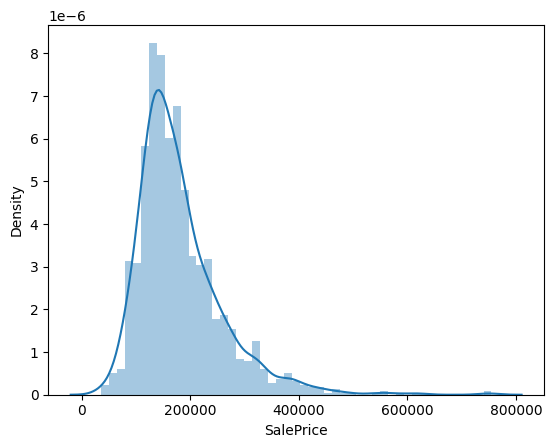

In [20]:
sns.distplot(df['SalePrice']);

In [21]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


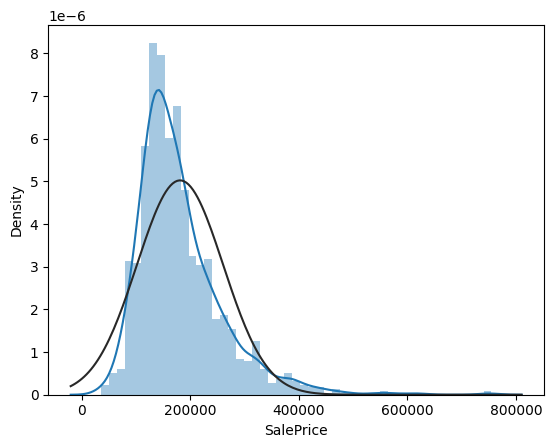

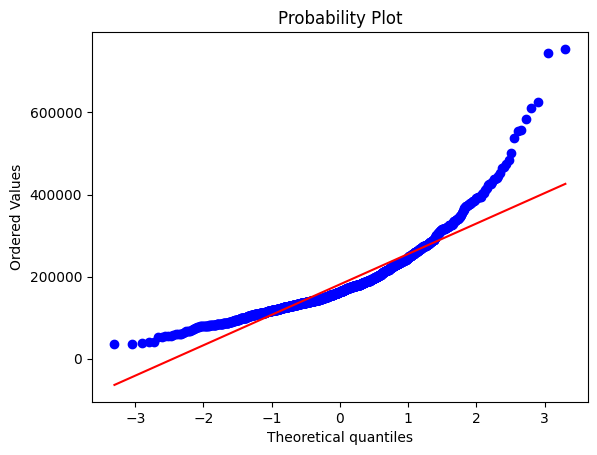

In [22]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

Log transformation of positively skewed data is a common data transformation method that can make the data closer to a normal distribution or reduce its skewness. Positively skewed data means there are some larger values in the data, and a logarithmic transformation helps eliminate the influence of these large values, making the data smoother.

>正偏数据的对数变换是一种常见的数据变换方法，可以使数据更接近正态分布或降低其偏度。 正偏数据意味着数据中存在一些较大的值，对数变换有助于消除这些大值的影响，使数据更加平滑。

**df['SalePrice'] = np.log(df['SalePrice'])**

In [23]:
from scipy.stats import shapiro
stat, p = shapiro(df.SalePrice)
stat,p

(0.869672954082489, 3.2072044604461286e-33)

In [24]:
p < 0.05

True

*So far, only descriptive analysis has been done to help you gain a deeper understanding of the data, but it has not changed the data.*
>*到目前为止只做了描述性分析，帮助你对数据有更深入的认识，但是并没有改变数据。*

# 2.Data preprocessing 
Data preprocessing generally includes the processing of outliers and missing values:
<br>Identify numerical outliers and replace them with NAN.
<br>Missing values are processed from two perspectives: column and row.
>数据预处理一般包括异常值和缺失值的处理：
<br>识别数值变量的异常值，并用NAN替换。
<br>对缺失值的处理分别从列和行的两个角度切入。

## 2.1 Outliers
Identify and remove outliers based on **IQR** numerical variables(repalcement with NAN)
>基于IQR对数值变量识别并清除异常值(用缺失值替换）

In [25]:
def replace_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    column[column < lower_threshold] = np.nan
    column[column > upper_threshold] = np.nan
    return column

In [26]:
for col in numeric_columns.columns:
    df[col] = replace_outliers_with_nan(df[col])

## 2.1 Junk Features (column perspective)

A.clear Features with missing values greater than 15%    
>清除缺失值大于15%的特征

B.Remove categorical variables whose cardinality is greater than 10 or equal to 1
>清除基数大于10或者等于1的分类变量

C.Remove features that have one category accounting for more than 95% of the categorical variables
>清除分类变量中有一个类别占比95%以上的特征

In [27]:
nan_over15 = missing_percentage[missing_percentage >0.15]
over10 = [cname for cname in df.columns if
                    (df[cname].nunique() >= 10 or df[cname].nunique() == 1)and
                    df[cname].dtype == "category"]
over95 = []
l = len(df)
for column in categorical_columns:
    category_percent = df[column].value_counts() / l
    if any(category_percent >= 0.95):
        over95.append(column)

In [28]:
columns_to_remove = over10 + list(nan_over15.index) + over95
columns_to_remove = list(set(columns_to_remove))
columns_to_remove

['MiscFeature',
 'Alley',
 'Condition2',
 'FireplaceQu',
 'LotFrontage',
 'Fence',
 'Utilities',
 'PoolQC',
 'Street',
 'RoofMatl',
 'MasVnrType',
 'Heating']

In [29]:
df = df.drop(columns = columns_to_remove)

## 2.2 Junk sample (row perspective)
There are generally two methods here.
<br>Remove samples or interpolations with missing values
>这里一般有两种方法。
删除含有缺失值的样本或插值

In [30]:
filtered_rows = missing_info[~missing_info.index.isin(columns_to_remove)]
filtered_rows

,missing_type,Missing Columns,Missing Percentage
GarageYrBlt,float64,81,0.055479
GarageCond,object,81,0.055479
GarageType,object,81,0.055479
GarageFinish,object,81,0.055479
GarageQual,object,81,0.055479
BsmtExposure,object,38,0.026027
BsmtFinType2,object,38,0.026027
BsmtCond,object,37,0.025342
BsmtQual,object,37,0.025342
BsmtFinType1,object,37,0.025342


There are still some missing values, but the proportion is not large. Here we choose to directly delete the samples containing missing values.
>仍然有一些缺失值，但是比例不大，这里选择直接删除包含缺失值的样本

In [31]:
df = df.dropna()

## 2.4 Mutual information
After dealing with outliers and missing values, it is time to code the remaining categorical variables.
<br>There are generally two methods: **integer encoding** and **one-hot encoding**. How to choose is a matter of opinion.
<br>It is generally believed that integer encoding is selected when there is a certain **order relationship** between different categories. If you want to clearly preserve the **independence** between categories without introducing a sequential relationship, choose one-hot encoding.
>处理完异常值和缺失值之后就可以对剩下的分类变量进行编码了。
<br>一般有**整数编码**和**独热编码**两种方式。怎么选择就见仁见智了。
<br>一般认为不同的类别之间存在某种**顺序关系**时选择整数编码。想要明确地保留了类别之间的**独立性**，不引入顺序关系则选择独热编码。

Here the mutual information is calculated and the copy of the data is integer encoded.
>这里要计算互信息，对数据的副本进行整数编码。

In [32]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    mi_type = df[mi_scores.index].dtypes
    mi_type.name = 'Type'
    mi = pd.concat([mi_scores,mi_type],axis=1)
    return mi
def plot_mi_scores(mi):
    scores = mi.iloc[:,0]
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(30, 30))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [33]:
mi = make_mi_scores(df.drop('SalePrice',axis = 1),df.SalePrice)
mi

,MI Scores,Type
OverallQual,0.602271,float64
Neighborhood,0.522276,object
GrLivArea,0.482147,float64
YearBuilt,0.463899,float64
GarageYrBlt,0.411331,float64
YearRemodAdd,0.396587,int64
GarageArea,0.391432,float64
FullBath,0.386790,int64
GarageCars,0.382407,float64
TotalBsmtSF,0.378666,float64


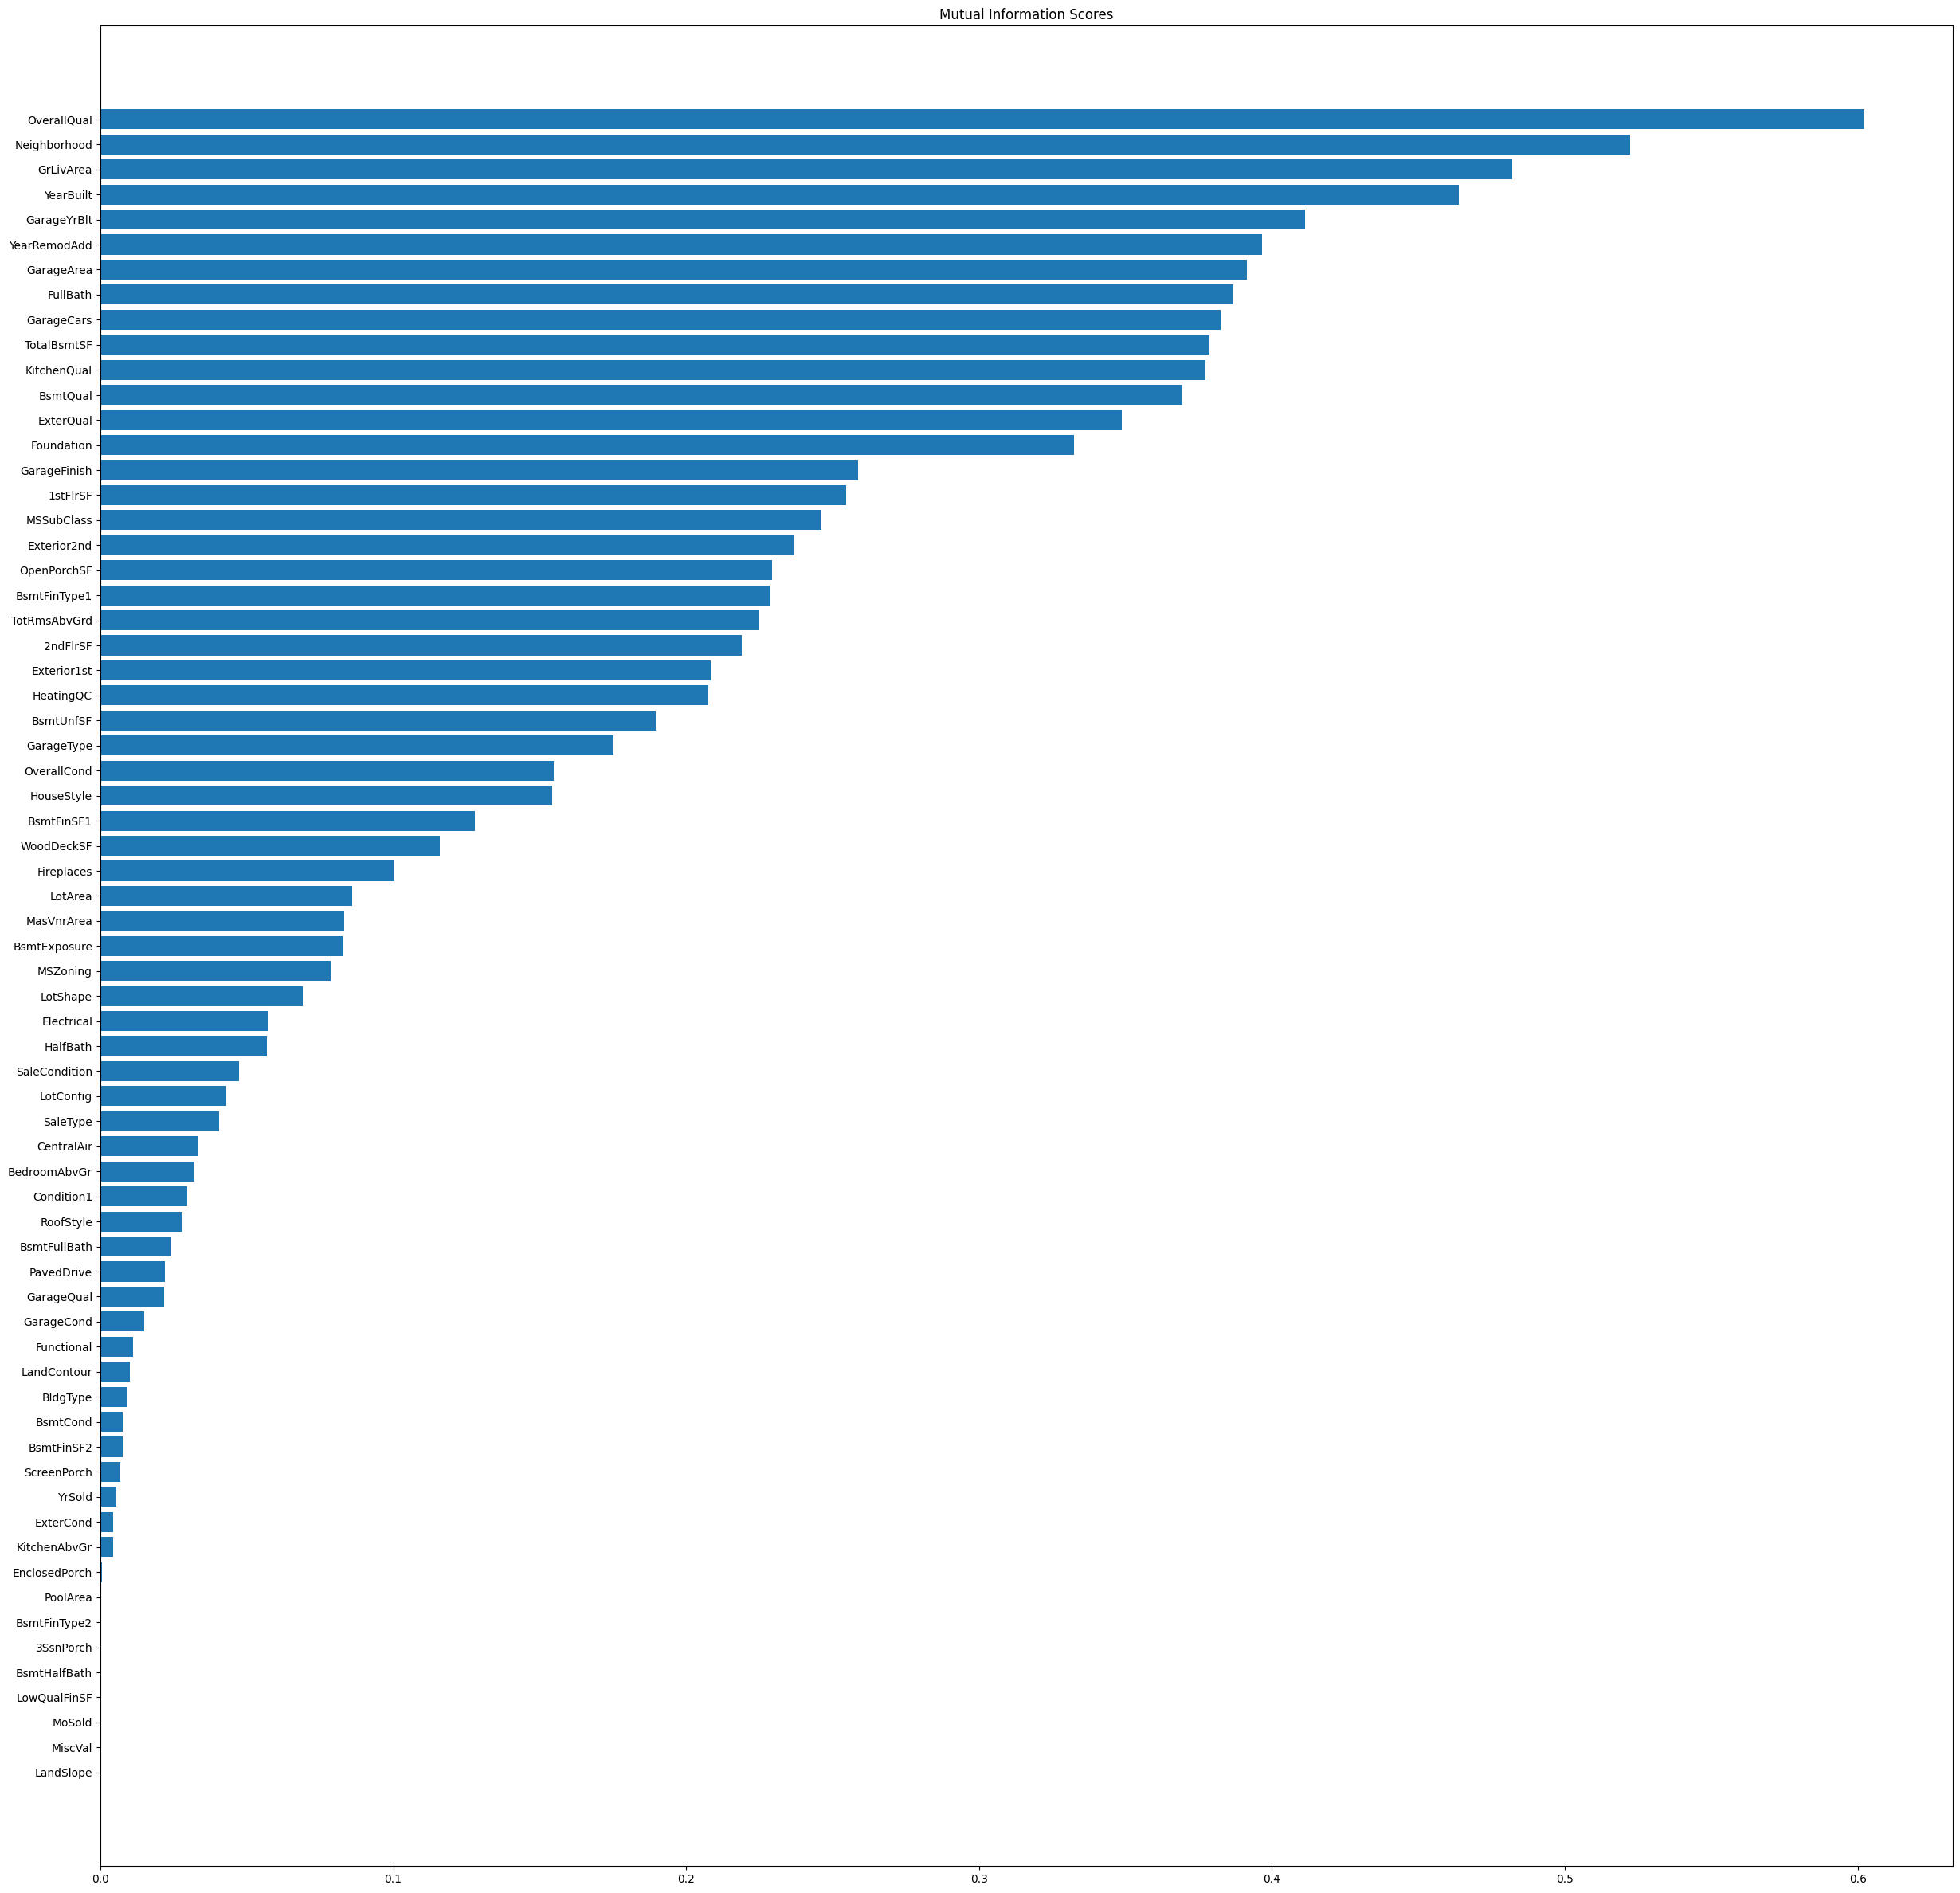

In [34]:
plot_mi_scores(mi)

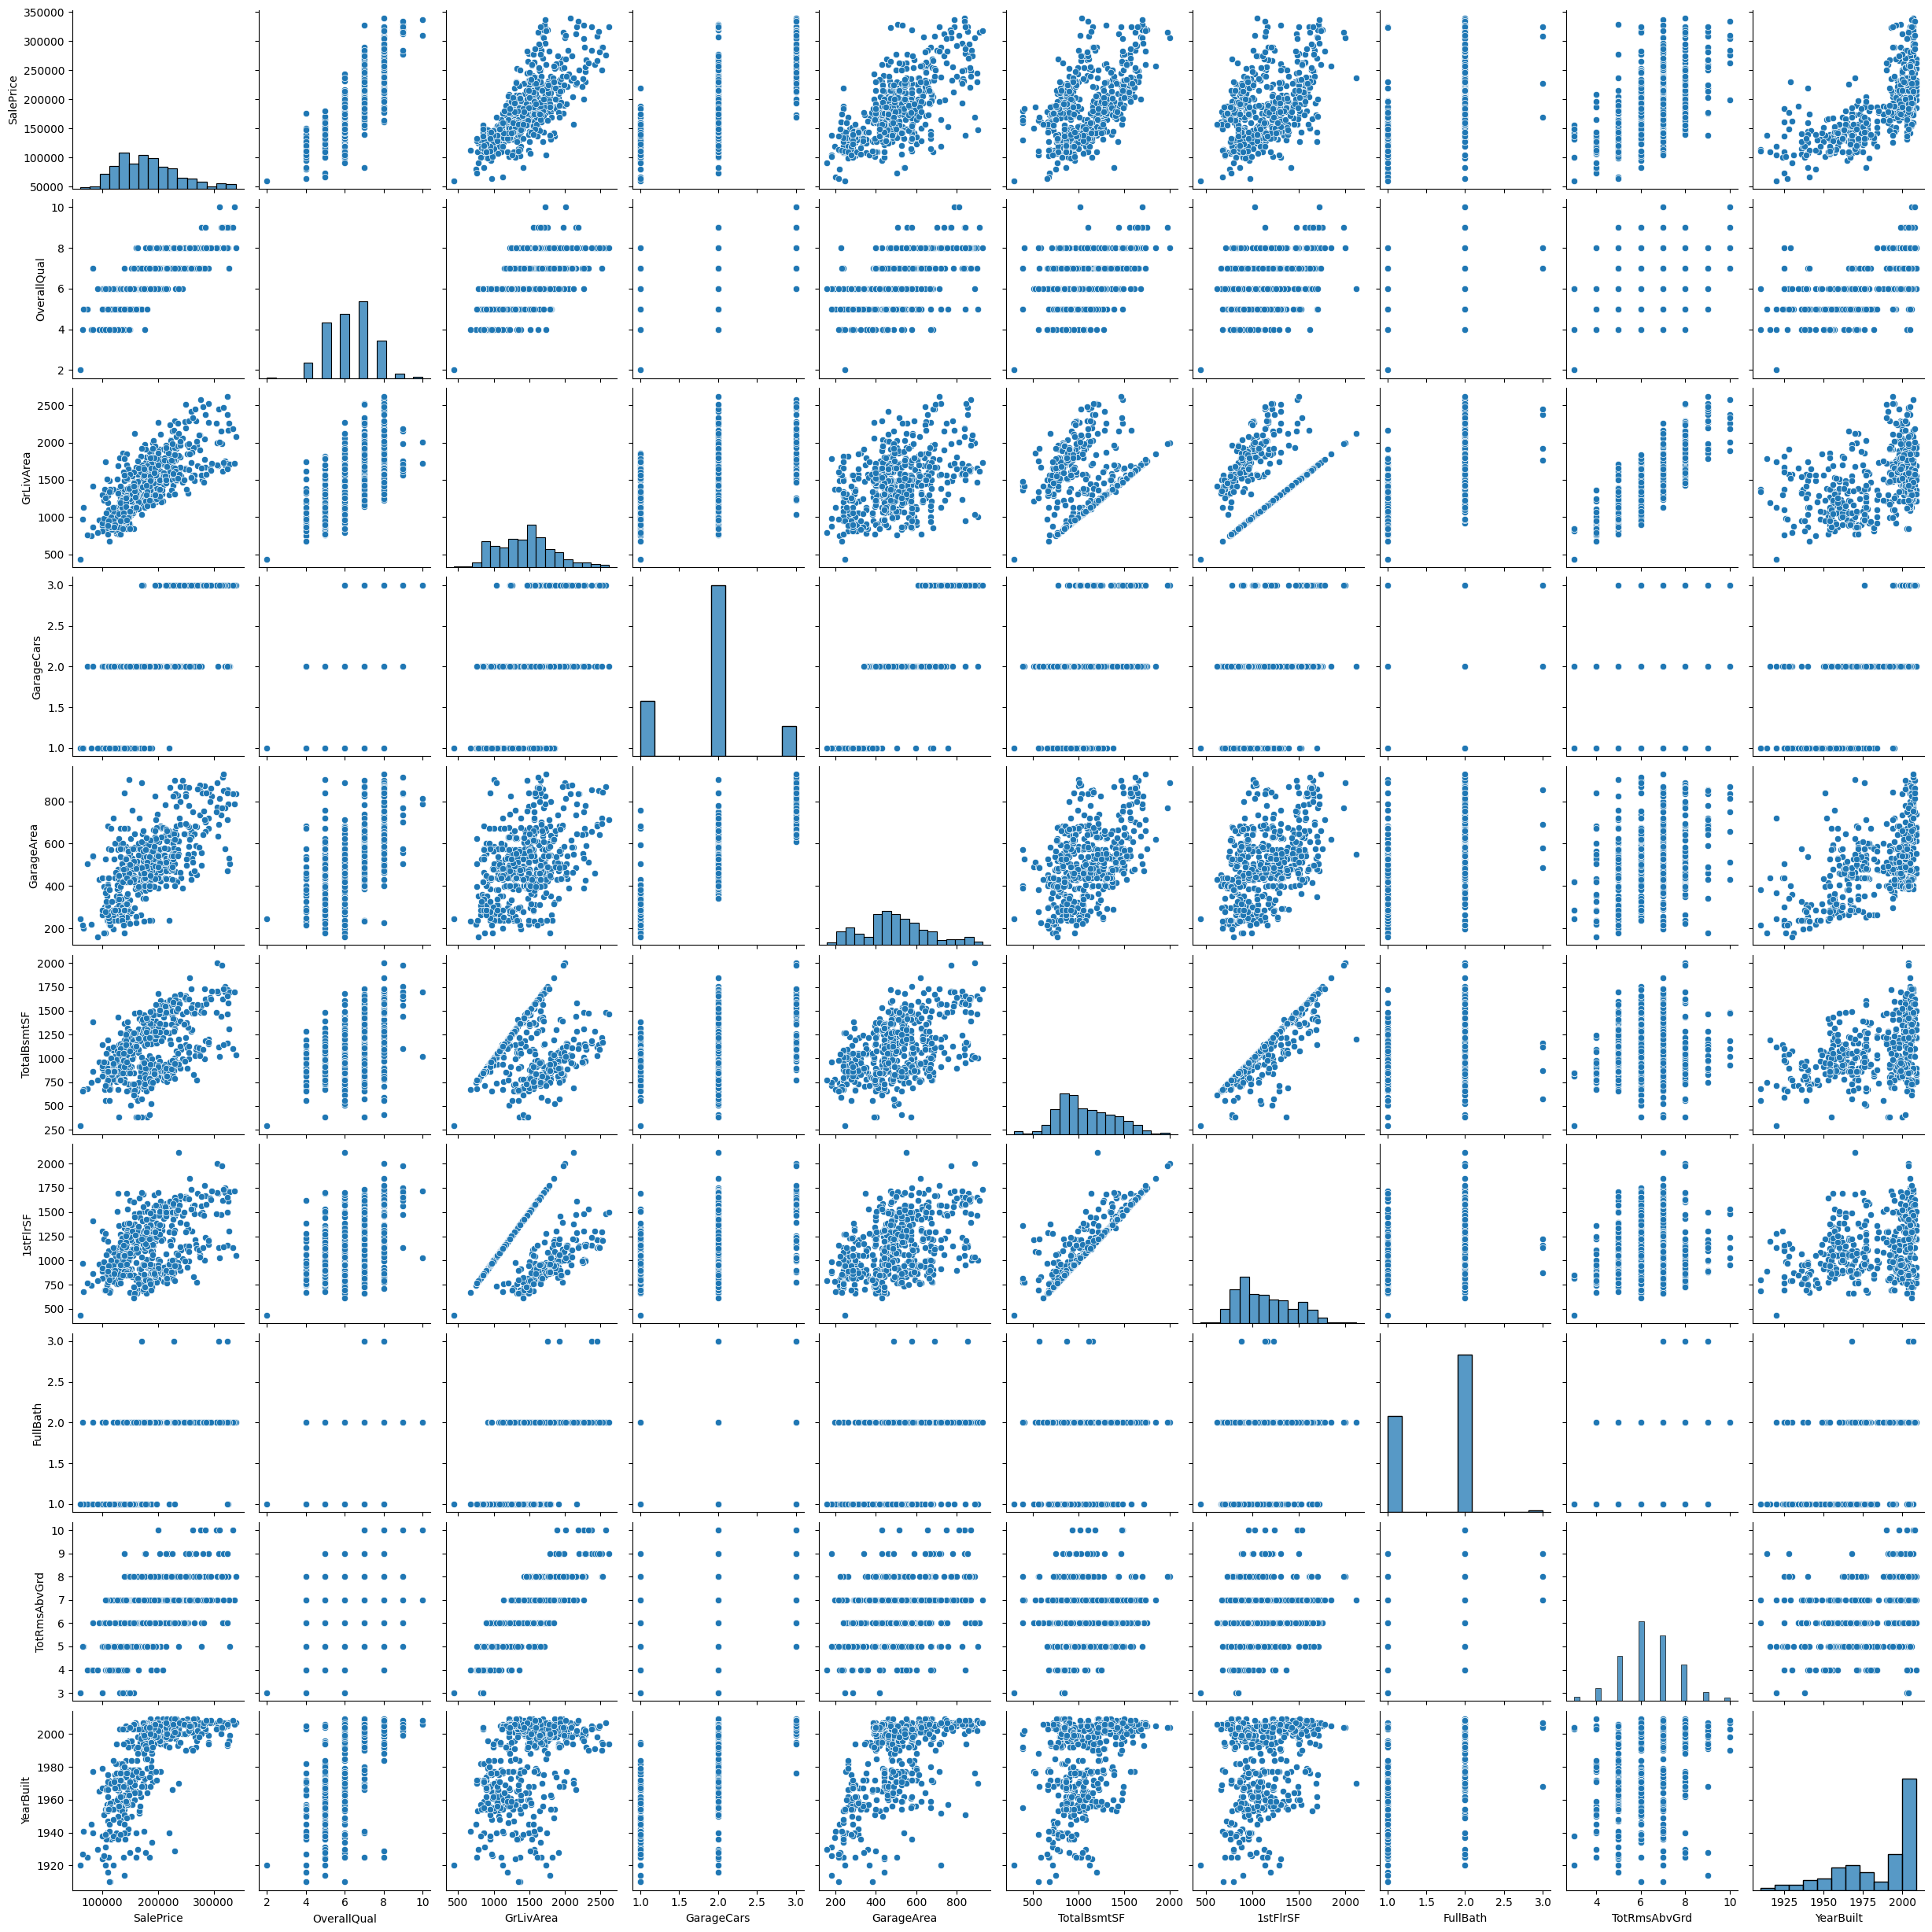

In [35]:
cols_select = ['SalePrice', 'OverallQual', 'GrLivArea','Neighborhood','GarageArea','YearBuilt', 'TotalBsmtSF', 'FullBath' ,'GarageYrBlt','YearRemodAdd']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [36]:
cols_select.remove('SalePrice')
df['Neighborhood'].head()

0     CollgCr
2     CollgCr
4     NoRidge
6     Somerst
10     Sawyer
Name: Neighborhood, dtype: object

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

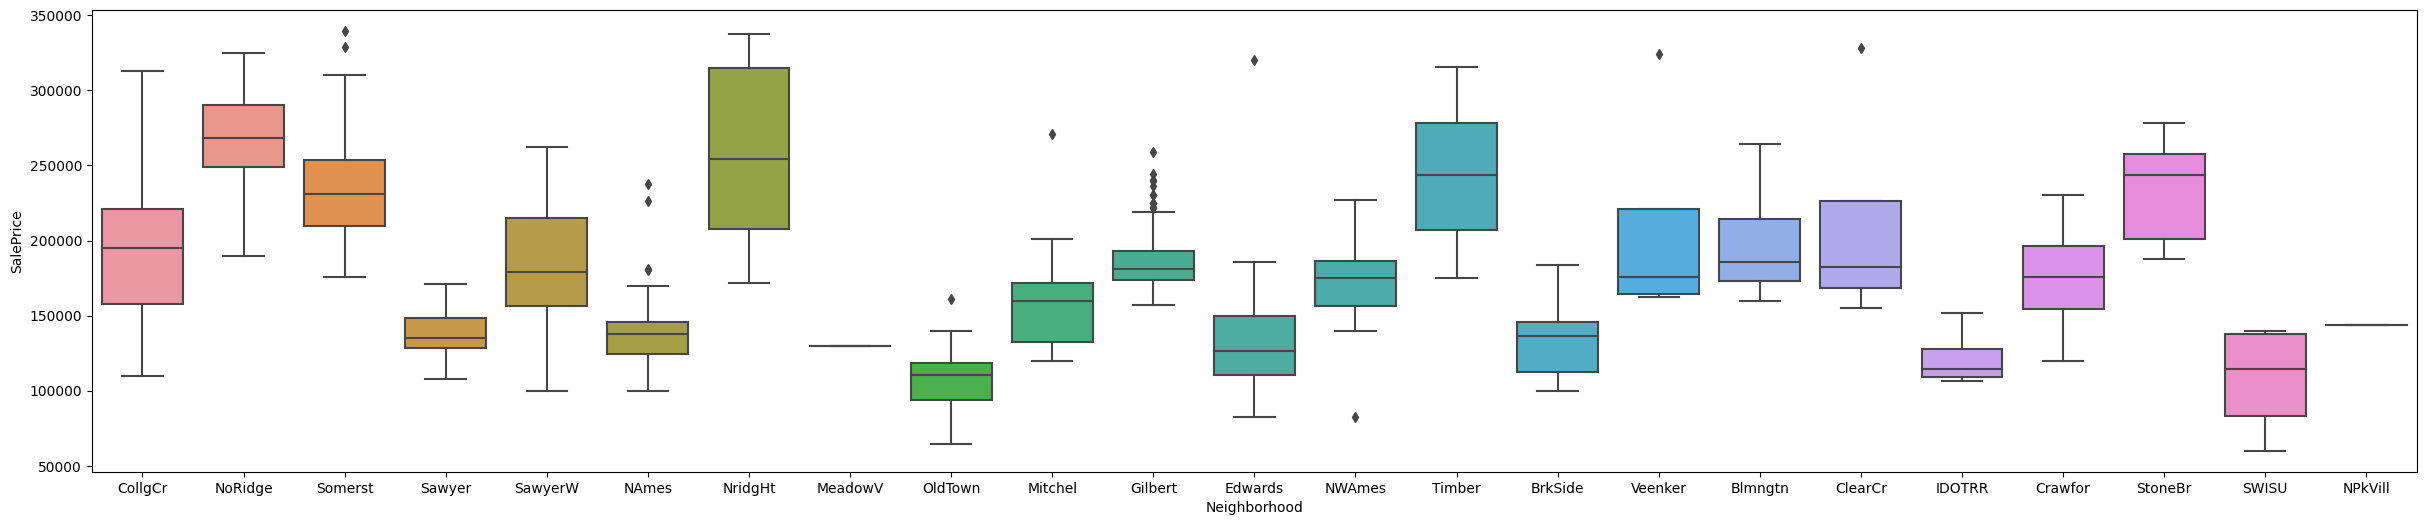

In [37]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='Neighborhood', y="SalePrice", data=df)

In [38]:
df['Neighborhood'].value_counts()['NPkVill']

1

In [39]:
df['Neighborhood'].value_counts()['MeadowV']

1

In [40]:
indices_to_drop = df[df['Neighborhood'].isin(['NPkVill', 'MeadowV'])].index
df = df.drop(indices_to_drop)

The selected variables are all numerical variables except Neighborhood. Neighborhood has no order relationship, so one-hot encoding is selected.
<br>GarageCars and GarageArea have a relatively strong correlation, just choose one when selecting features.
>选取的变量除了Neighborhood都是数值型变量，Neighborhood没有顺序关系，选择独热编码。
<br>GarageCars和GarageArea具有比较强的相关性，特征选择的时候选一个就可以了。

---

# 3.Train model 

## 3.1 Define a baseline with XGBoost

In [41]:
X = df[cols_select]
y = df.SalePrice

In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

def score_dataset(X, y, model=XGBRegressor()):
    col_cat = []
    for colname in X.select_dtypes(["O"]):
        X[colname] = X[colname].astype('category')
        col_cat.append(colname)
    X = pd.get_dummies(X, columns=col_cat, prefix=col_cat, drop_first=True)
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    model.fit(X, log_y)
    
    return score,model,X
baseline_score,model,X0 = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.5f} RMSLE")

Baseline score: 0.12336 RMSLE


---
下面的还没有完成

## Define preprocessing steps and create pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---

In [43]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
X_p = test_data[cols_select]

In [44]:
X_p = X_p.fillna(method='ffill');

In [45]:
X_p['Neighborhood'] = X_p['Neighborhood'].astype('category')
X_p = pd.get_dummies(X_p, columns=['Neighborhood'], prefix=['Neighborhood'], drop_first=True)

In [46]:
# 找到 df1 中多出的列
extra_columns = set(X_p.columns) - set(X0.columns)

# 从 df1 中移除多出的列
X_p = X_p.drop(columns=extra_columns)
extra_columns

{'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill'}

In [47]:
X0.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF',
       'FullBath', 'GarageYrBlt', 'YearRemodAdd', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [48]:
X_p.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF',
       'FullBath', 'GarageYrBlt', 'YearRemodAdd', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [49]:
predictions =np.exp(model.predict(X_p))

In [50]:
output = pd.DataFrame({'Id': test_data['Id'],
                       'SalePrice':predictions})
output.to_csv('./submission.csv',sep=',',index = False)

In [51]:
output.head()

,Id,SalePrice
0,1461,120667.742188
1,1462,148959.453125
2,1463,179039.843750
3,1464,182237.453125
4,1465,192437.593750
